Descriptive Statistics:
                           count          mean          std     min     25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.0   
Attrition                 1470.0      0.161224     0.367863     0.0     0.0   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.0   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.0   
Education                 1470.0      2.912925     1.024165     1.0     2.0   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.0   
Gender                    1470.0      0.600000     0.490065     0.0     0.0   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.0   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.0   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.0   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.0   
MonthlyIncome             14

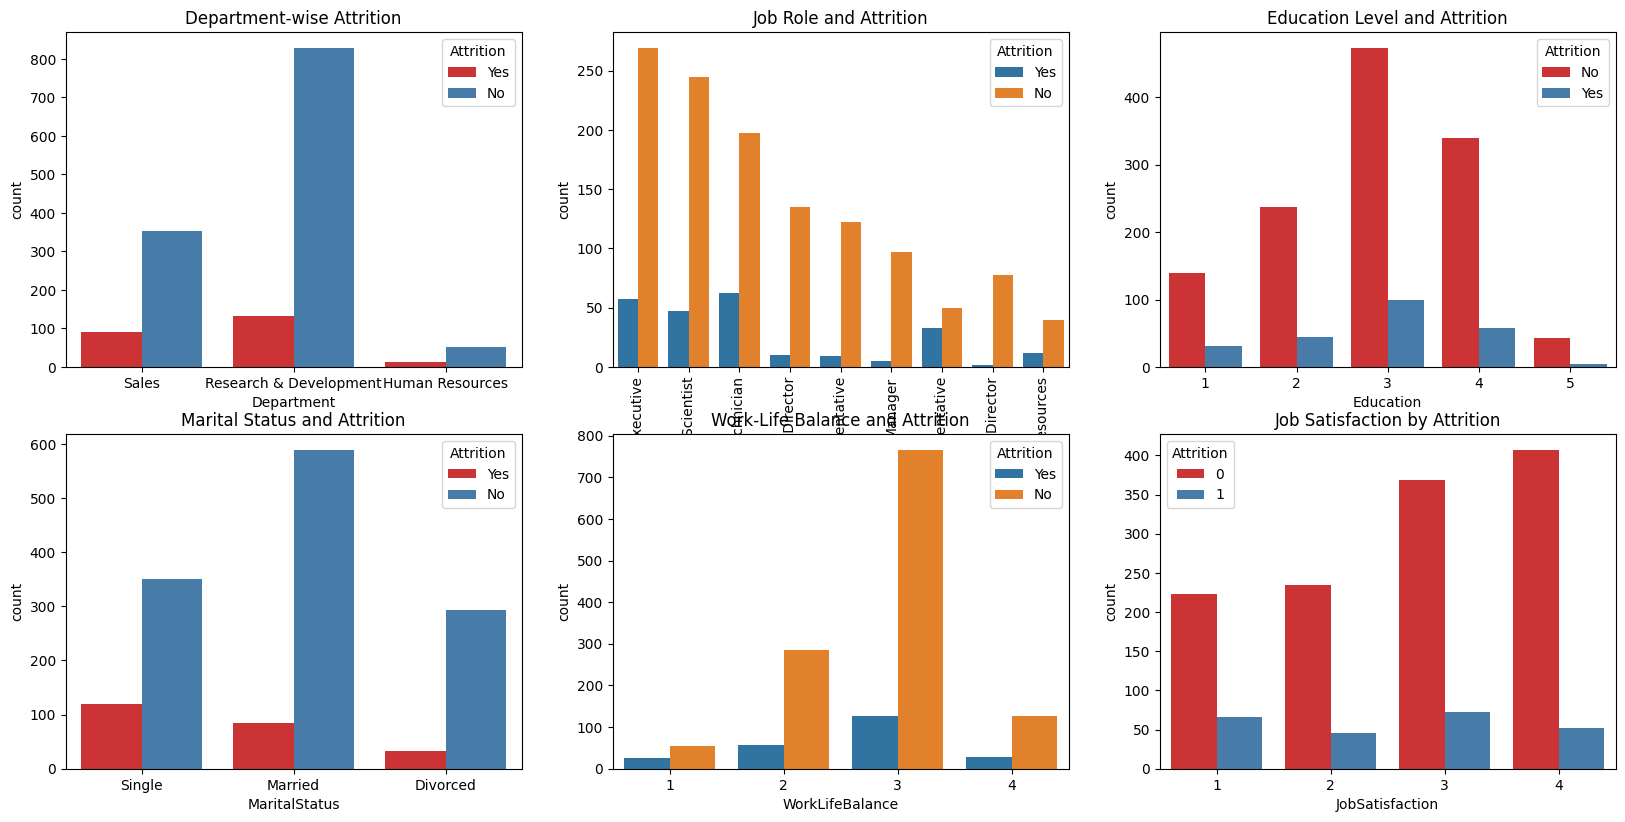

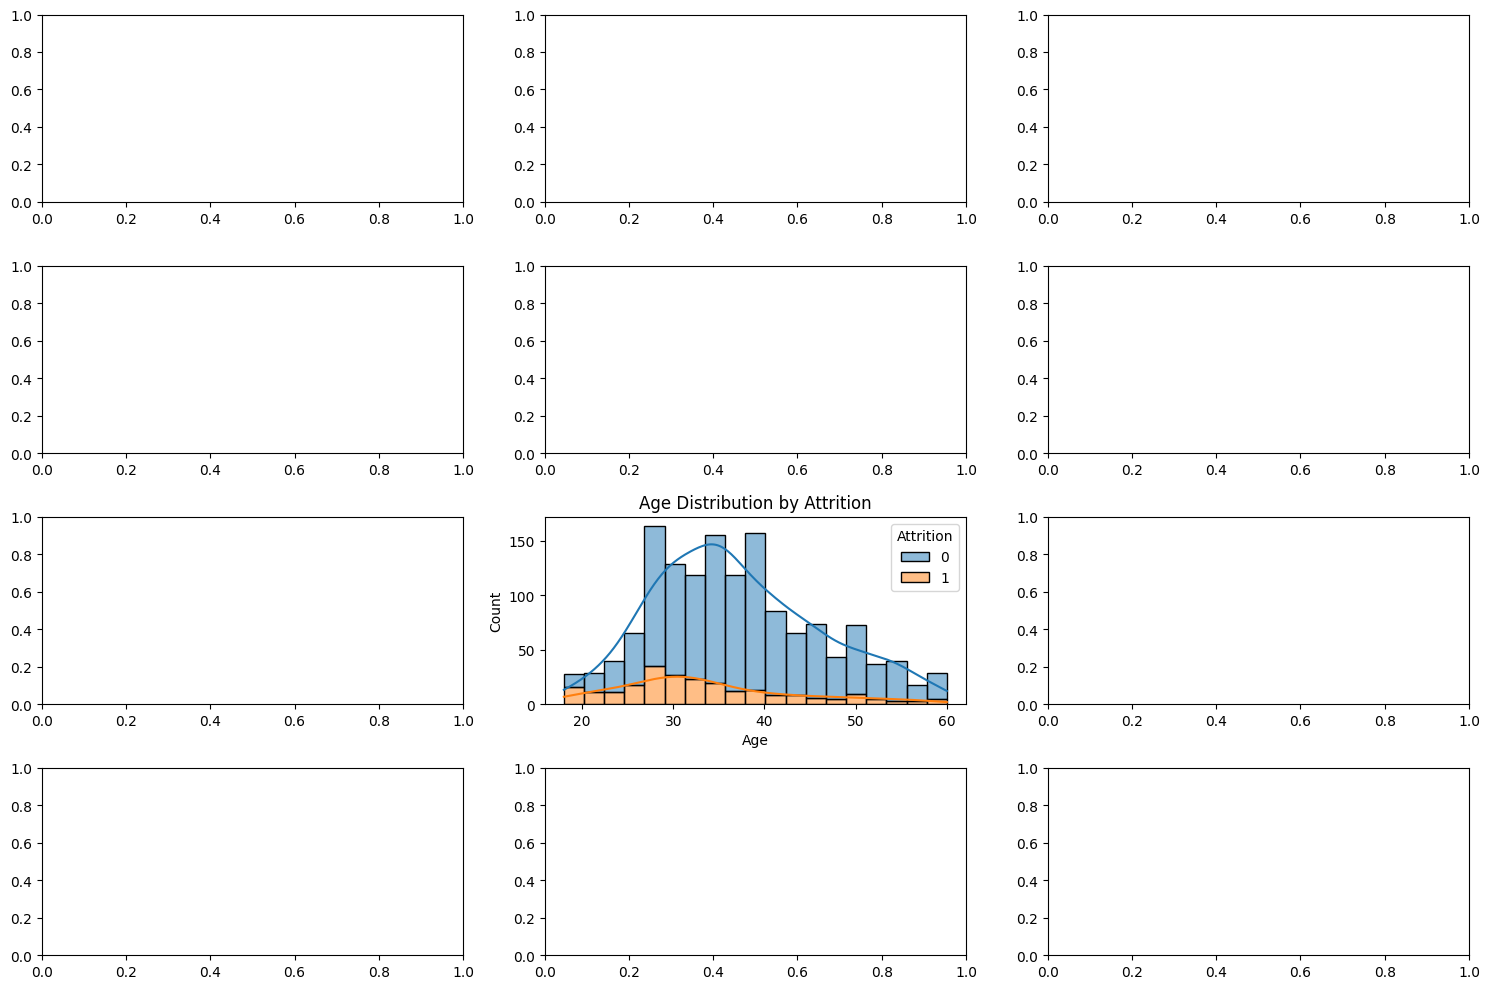

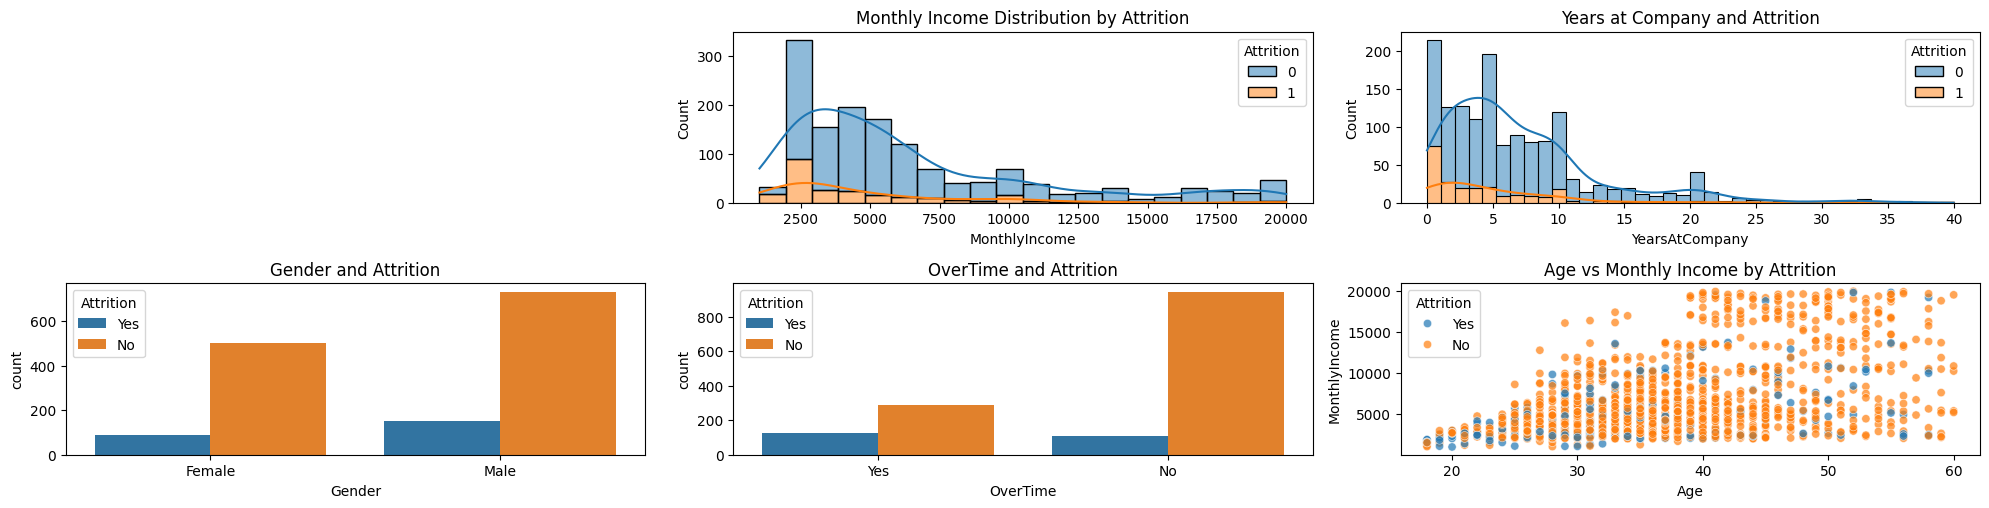

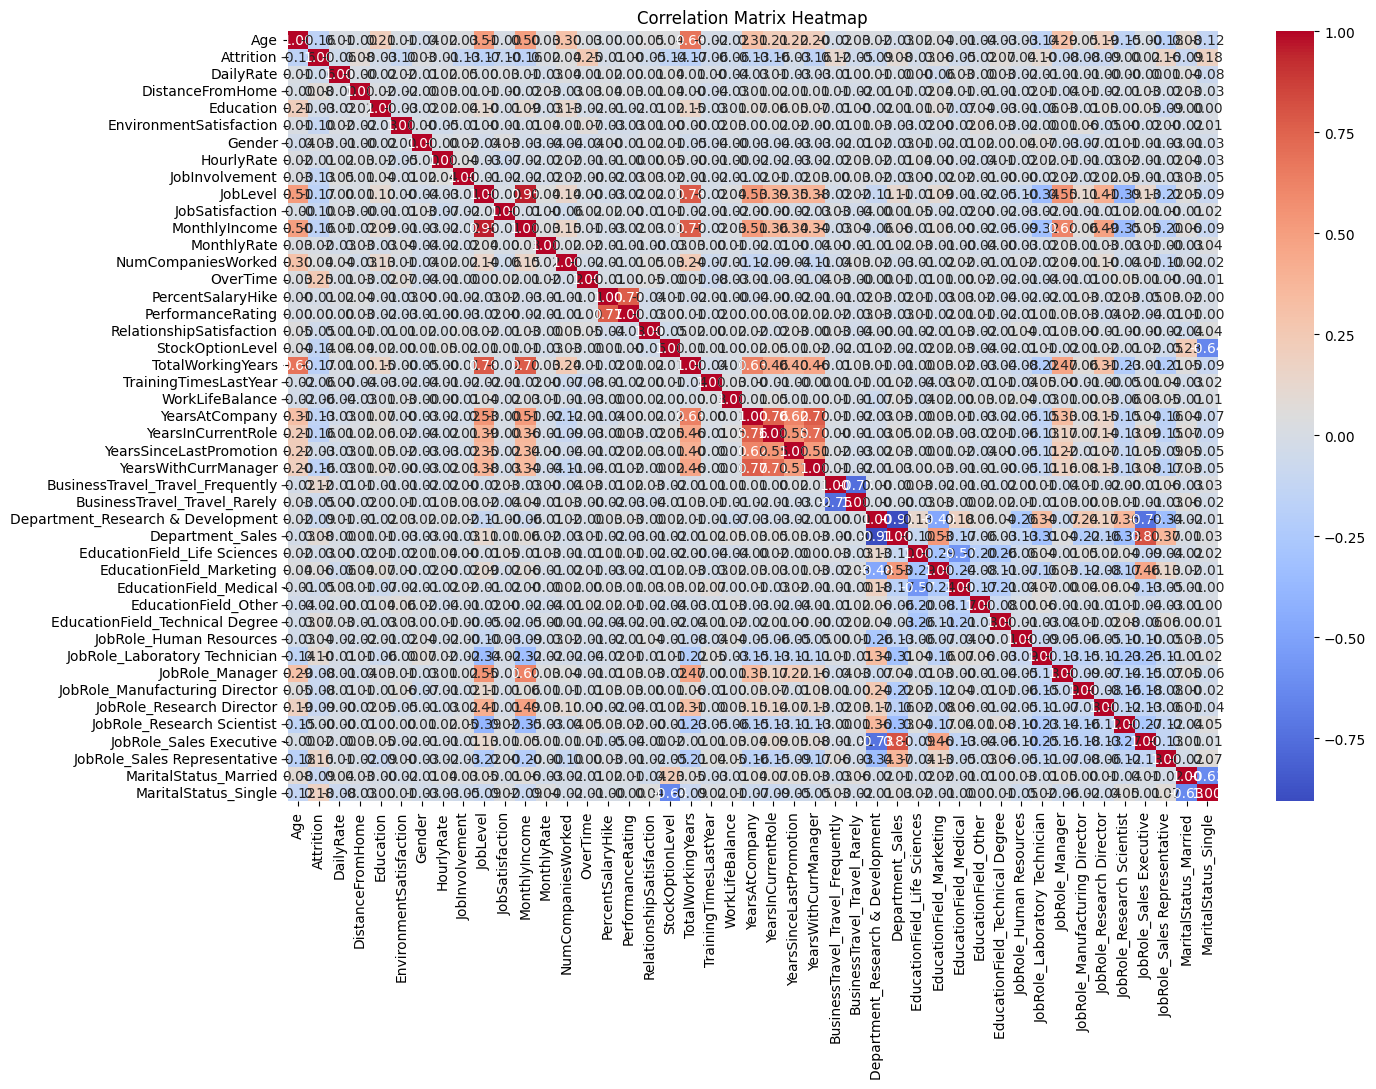

Logistic Regression:
Confusion Matrix:
 [[359  21]
 [ 37  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       380
           1       0.53      0.39      0.45        61

    accuracy                           0.87       441
   macro avg       0.72      0.67      0.69       441
weighted avg       0.85      0.87      0.86       441

Accuracy: 0.8684807256235828

Random Forest Classifier:
Confusion Matrix:
 [[376   4]
 [ 54   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.64      0.11      0.19        61

    accuracy                           0.87       441
   macro avg       0.76      0.55      0.56       441
weighted avg       0.84      0.87      0.83       441

Accuracy: 0.8684807256235828

Gradient Boosting Classifier:
Confusion Matrix:
 [[368  12]
 [ 44  17]]
Classification Report:
            

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv(r"C:\Users\ashum\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Drop irrelevant columns
columns_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
data_cleaned = data.drop(columns=columns_to_drop)

# Encode categorical columns
data_cleaned['Attrition'] = data_cleaned['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
data_cleaned['Gender'] = data_cleaned['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
data_cleaned['OverTime'] = data_cleaned['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode remaining categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

# Descriptive statistics
desc_stats = data_encoded.describe().transpose()
print("Descriptive Statistics:")
print(desc_stats)

# Correlation matrix
corr_matrix = data_encoded.corr()

# Plotting
plt.figure(figsize=(20, 20))

# Department-wise attrition
plt.subplot(4, 3, 1)
sns.countplot(data=data, x='Department', hue='Attrition', palette='Set1')
plt.title('Department-wise Attrition')

# Job role and attrition
plt.subplot(4, 3, 2)
sns.countplot(data=data, x='JobRole', hue='Attrition')
plt.title('Job Role and Attrition')
plt.xticks(rotation=90)

# Education level and attrition
plt.subplot(4, 3, 3)
sns.countplot(data=data, x='Education', hue='Attrition', palette='Set1')
plt.title('Education Level and Attrition')

# Marital status and attrition
plt.subplot(4, 3, 4)
sns.countplot(data=data, x='MaritalStatus', hue='Attrition', palette='Set1')
plt.title('Marital Status and Attrition')

# Work-life balance and attrition
plt.subplot(4, 3, 5)
sns.countplot(data=data, x='WorkLifeBalance', hue='Attrition')
plt.title('Work-Life Balance and Attrition')

# Job satisfaction by attrition
plt.subplot(4, 3, 6)
sns.countplot(data=data_encoded, x='JobSatisfaction', hue='Attrition', palette='Set1')
plt.title('Job Satisfaction by Attrition')

# Create a subplot with the specified dimensions
fig, axs = plt.subplots(4, 3, figsize=(15, 10))

# Plot Age distribution by attrition
sns.histplot(data=data_encoded, x='Age', hue='Attrition', kde=True, multiple='stack', ax=axs[2, 1])
axs[2, 1].set_title('Age Distribution by Attrition')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

# Monthly income distribution by attrition
plt.figure(figsize=(20, 10))
plt.subplot(4, 3, 8)
sns.histplot(data=data_encoded, x='MonthlyIncome', hue='Attrition', kde=True, multiple='stack')
plt.title('Monthly Income Distribution by Attrition')

# Years at company and attrition
plt.subplot(4, 3, 9)
sns.histplot(data=data_encoded, x='YearsAtCompany', hue='Attrition', kde=True, multiple='stack')
plt.title('Years at Company and Attrition')

# Gender and attrition
plt.subplot(4, 3, 10)
sns.countplot(data=data, x='Gender', hue='Attrition')
plt.title('Gender and Attrition')

# OverTime and attrition
plt.subplot(4, 3, 11)
sns.countplot(data=data, x='OverTime', hue='Attrition')
plt.title('OverTime and Attrition')

# Scatter plot for Age vs MonthlyIncome colored by Attrition
plt.subplot(4, 3, 12)
sns.scatterplot(data=data, x='Age', y='MonthlyIncome', hue='Attrition', alpha=0.7)
plt.title('Age vs Monthly Income by Attrition')

plt.tight_layout()
plt.show()

# Heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Split data into features and target variable
X = data_encoded.drop('Attrition', axis=1)
y = data_encoded['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

# RandomForest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("\nRandom Forest Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

print("\nGradient Boosting Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
